In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk

nltk.download('gutenberg')
!python -m spacy download en

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\sajee\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\en_core_web_sm
-->
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


You do not have sufficient privilege to perform this operation.


In [2]:
#getting the list of docs available in gutenberg.
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [3]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
    return text
    
# Load and clean the data from milton-paradise and melville-moby_dick.
milton = gutenberg.raw('milton-paradise.txt')
melville = gutenberg.raw('melville-moby_dick.txt')



In [4]:
#printing milton, uncleaned.
print(milton[:400])

[Paradise Lost by John Milton 1667] 
 
 
Book I 
 
 
Of Man's first disobedience, and the fruit 
Of that forbidden tree whose mortal taste 
Brought death into the World, and all our woe, 
With loss of Eden, till one greater Man 
Restore us, and regain the blissful seat, 
Sing, Heavenly Muse, that, on the secret top 
Of Oreb, or of Sinai, didst inspire 
That shepherd who first taught the chosen see


In [5]:
#printing melville, uncleaned.
print(melville[:400])

[Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  He loved to dust his old grammars; it
so


In [6]:
# This pattern matches all text between square brackets; using it to get rid of the titles.
pattern = "[\[].*?[\]]"
melville = re.sub(pattern, "", melville)
milton = re.sub(pattern, "", milton)

# This pattern matches all text between parentheses
pattern2 = "\\((.*?)\\)"
melville = re.sub(pattern2, "", melville)

#removing the word "Etymology" from the beginning to melville doc
pattern3 = "E[T][Y][M][O][L][O][G][Y][.]"
melville = re.sub(pattern3, "", melville)

# The Chapter indicator is idiosyncratic r'Book \d+', so we are removing it.
milton = re.sub(r'Book .*', '', milton)
melville = re.sub(r'CHAPTER .*', '', melville)

In [7]:
#printing milton with title removed.
print(milton[:400])

 
 
 

 
 
Of Man's first disobedience, and the fruit 
Of that forbidden tree whose mortal taste 
Brought death into the World, and all our woe, 
With loss of Eden, till one greater Man 
Restore us, and regain the blissful seat, 
Sing, Heavenly Muse, that, on the secret top 
Of Oreb, or of Sinai, didst inspire 
That shepherd who first taught the chosen seed 
In the beginning how the heavens and ea


In [8]:
#printing melville with title removed.
print(melville[:400])








The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

"While you take in hand to school others, and to teach t


In [9]:
#milton = text_cleaner(milton[:int(len(milton)/10)])
#melville = text_cleaner(melville[:int(len(melville)/10)])

In [10]:
print(len(milton))
print(len(melville))

467454
1237754


In [11]:
milton = text_cleaner(milton)
melville = text_cleaner(melville)

In [12]:
print(len(milton))

455711


In [13]:
print(type(milton))

<class 'str'>


In [14]:
#printing the first 10 characters of milton
print(milton[0:10])

Of Man's f


In [15]:
print(len(melville))

1203942


In [16]:
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [17]:
# Load and clean the rest of the data.
austen = gutenberg.raw('austen-emma.txt')
blake = gutenberg.raw('blake-poems.txt')
bryant = gutenberg.raw('bryant-stories.txt')
burgess = gutenberg.raw('burgess-busterbrown.txt')
carroll = gutenberg.raw('carroll-alice.txt')
chesterton = gutenberg.raw('chesterton-ball.txt')
edgeworth = gutenberg.raw('edgeworth-parents.txt')
shakespeare = gutenberg.raw('shakespeare-caesar.txt')

### Cleaning Austen and Carroll

In [18]:
print(austen[:400])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence o


In [19]:
print(carroll[:400])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she


In [20]:
#cleaning austen-emma
# The Chapter indicator is idiosyncratic
austen = re.sub(r'VOLUME \w+', '', austen)
austen = re.sub(r'CHAPTER \w+', '', austen)

# This pattern matches all text between square brackets; using it to get rid of the titles.
pattern_removingTitle = "[\[].*?[\]]"
austen = re.sub(pattern_removingTitle, "", austen)


#cleaning carroll
carroll = re.sub(r'CHAPTER .*', '', carroll)

# This pattern matches all text between square brackets; using it to get rid of the titles for carroll-alice
carroll = re.sub(pattern_removingTitle, "", carroll)

In [21]:
print(austen[:400])








Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of h


In [22]:
print(carroll[:400])





Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel v


In [23]:
print("lenght of austen: ", len(austen))
print(type(austen))

#cleaning austen further
austen = text_cleaner(milton)

print("length of austen: ", len(austen))
print()
print("lenght of carroll: ", len(carroll))
print(type(carroll))

#cleaning austen further
carroll = text_cleaner(carroll)

print("length of carroll: ", len(carroll))



lenght of austen:  886417
<class 'str'>
length of austen:  455711

lenght of carroll:  143952
<class 'str'>
length of carroll:  141708


### Cleaning Bryant:

In [24]:
print(bryant[:400])

[Stories to Tell to Children by Sara Cone Bryant 1918] 


TWO LITTLE RIDDLES IN RHYME


     There's a garden that I ken,
     Full of little gentlemen;
     Little caps of blue they wear,
     And green ribbons, very fair.
           (Flax.)

     From house to house he goes,
     A messenger small and slight,
     And whether it rains or snows,
     He sleeps outside in the night.


In [25]:
# This pattern matches all text between square brackets; using it to get rid of the titles.
pattern_removingTitle = "[\[].*?[\]]"
bryant = re.sub(pattern_removingTitle, "", bryant)

In [26]:
print(bryant[:400])

 


TWO LITTLE RIDDLES IN RHYME


     There's a garden that I ken,
     Full of little gentlemen;
     Little caps of blue they wear,
     And green ribbons, very fair.
           (Flax.)

     From house to house he goes,
     A messenger small and slight,
     And whether it rains or snows,
     He sleeps outside in the night.
           (The path.)




THE LITTLE YELLOW TU


In [27]:
print("lenght of bryant: ", len(bryant))
print(type(bryant))

#cleaning bryant further
austen = text_cleaner(bryant)

print("length of bryant: ", len(bryant))

lenght of bryant:  249343
<class 'str'>
length of bryant:  249343


### Cleaning Burgess-Busterbrown

In [28]:
print(burgess[:400])

[The Adventures of Buster Bear by Thornton W. Burgess 1920]

I

BUSTER BEAR GOES FISHING


Buster Bear yawned as he lay on his comfortable bed of leaves and
watched the first early morning sunbeams creeping through the Green
Forest to chase out the Black Shadows. Once more he yawned, and slowly
got to his feet and shook himself. Then he walked over to a big
pine-tree, stood up on his hi


In [29]:
#cleaning burgess
# This pattern matches all text between square brackets; using it to get rid of the titles.
pattern = "[\[].*?[\]]"
burgess = re.sub(pattern, "", burgess)





In [30]:
print(burgess[:400])



I

BUSTER BEAR GOES FISHING


Buster Bear yawned as he lay on his comfortable bed of leaves and
watched the first early morning sunbeams creeping through the Green
Forest to chase out the Black Shadows. Once more he yawned, and slowly
got to his feet and shook himself. Then he walked over to a big
pine-tree, stood up on his hind legs, reached as high up on the trunk of
the tree as he


In [31]:
print("lenght of burgess: ", len(burgess))
print(type(burgess))

#cleaning burgess further
burgess = text_cleaner(burgess)

print("length of burgess: ", len(burgess))

lenght of burgess:  84477
<class 'str'>
length of burgess:  82341


### Cleaning Blake-poems

In [32]:
print(blake[:400])

[Poems by William Blake 1789]

 
SONGS OF INNOCENCE AND OF EXPERIENCE
and THE BOOK of THEL


 SONGS OF INNOCENCE
 
 
 INTRODUCTION
 
 Piping down the valleys wild,
   Piping songs of pleasant glee,
 On a cloud I saw a child,
   And he laughing said to me:
 
 "Pipe a song about a Lamb!"
   So I piped with merry cheer.
 "Piper, pipe that song again;"
   So I piped: he wept to hear.
 
 "Drop thy pipe


In [33]:
#cleaning blake
# This pattern matches all text between square brackets; using it to get rid of the titles.
pattern_blake = "[\[].*?[\]]"
blake = re.sub(pattern_blake, "", blake)


#[\w*[A-Z]\w*[A-Z]\w*]"

pattern2_blake = "[I][N][T][R][O][D][U][C][T][I][O][N]"
blake = re.sub(pattern2_blake, "", blake)



In [34]:
print(blake[:400])



 
SONGS OF INNOCENCE AND OF EXPERIENCE
and THE BOOK of THEL


 SONGS OF INNOCENCE
 
 
 
 
 Piping down the valleys wild,
   Piping songs of pleasant glee,
 On a cloud I saw a child,
   And he laughing said to me:
 
 "Pipe a song about a Lamb!"
   So I piped with merry cheer.
 "Piper, pipe that song again;"
   So I piped: he wept to hear.
 
 "Drop thy pipe, thy happy pipe;
   Sing thy songs of ha


In [35]:
print("lenght of blake: ", len(blake))
print(type(blake))

#cleaning blake further
blake = text_cleaner(blake)

print("length of blake: ", len(blake))

lenght of blake:  38100
<class 'str'>
length of blake:  36025


### Cleaning Chesterton-ball

In [36]:
print(chesterton[:400])

[The Ball and The Cross by G.K. Chesterton 1909]


I. A DISCUSSION SOMEWHAT IN THE AIR

The flying ship of Professor Lucifer sang through the skies like
a silver arrow; the bleak white steel of it, gleaming in the
bleak blue emptiness of the evening.  That it was far above the
earth was no expression for it; to the two men in it, it seemed
to be far above the stars.  The professor had himself inve


In [37]:
#cleaning chesterton
# This pattern matches all text between square brackets; using it to get rid of the titles.
pattern_chesterton = "[\[].*?[\]]"
chesterton = re.sub(pattern_chesterton, "", chesterton)



#pattern3_chesterton = "I*"
#chesterton = re.sub(pattern3_chesterton, "", chesterton)

#pattern4_chesterton = "\sV\s"
#chesterton = re.sub(pattern4_chesterton, "", chesterton)

#pattern5_chesterton = "\sX\s"
#chesterton = re.sub(pattern5_chesterton, "", chesterton)

#pattern6_chesterton = "XV"
#chesterton = re.sub(pattern6_chesterton, "", chesterton)

#pattern7_chesterton = "I[V]"
#chesterton = re.sub(pattern6_chesterton, "", chesterton)

#pattern8_chesterton = "V[I]*"
#chesterton = re.sub(pattern8_chesterton, "", chesterton)

#pattern9_chesterton = "X[I]*"

In [38]:
print(chesterton[:400])




I. A DISCUSSION SOMEWHAT IN THE AIR

The flying ship of Professor Lucifer sang through the skies like
a silver arrow; the bleak white steel of it, gleaming in the
bleak blue emptiness of the evening.  That it was far above the
earth was no expression for it; to the two men in it, it seemed
to be far above the stars.  The professor had himself invented
the flying machine, and had also invented n


In [39]:
print("lenght of chesterton: ", len(chesterton))
print(type(chesterton))

#cleaning chesterton further
chesterton = text_cleaner(chesterton)

print("length of chesterton: ", len(chesterton))

lenght of chesterton:  457337
<class 'str'>
length of chesterton:  451975


### cleaning Edgeworth:

In [40]:
print(edgeworth[:400])

[The Parent's Assistant, by Maria Edgeworth]


THE ORPHANS.

Near the ruins of the castle of Rossmore, in Ireland, is a small cabin,
in which there once lived a widow and her four children.  As long as she
was able to work, she was very industrious, and was accounted the best
spinner in the parish; but she overworked herself at last, and fell ill,
so that she could not sit to her wheel as


In [41]:
#cleaning edgeworth
# This pattern matches all text between square brackets; using it to get rid of the titles.
pattern_edgeworth = "[\[].*?[\]]"
edgeworth = re.sub(pattern_edgeworth, "", edgeworth)


In [42]:
print(edgeworth[:400])




THE ORPHANS.

Near the ruins of the castle of Rossmore, in Ireland, is a small cabin,
in which there once lived a widow and her four children.  As long as she
was able to work, she was very industrious, and was accounted the best
spinner in the parish; but she overworked herself at last, and fell ill,
so that she could not sit to her wheel as she used to do, and was obliged
to give it


In [43]:
print("lenght of edgeworth: ", len(edgeworth))
print(type(edgeworth))

#cleaning edgeworth further
edgeworth = text_cleaner(edgeworth)

print("length of edgeworth: ", len(edgeworth))

lenght of edgeworth:  934977
<class 'str'>
length of edgeworth:  903897


### Cleaning Shakespeare

In [44]:
print(shakespeare[:400])

[The Tragedie of Julius Caesar by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Flauius, Murellus, and certaine Commoners ouer the Stage.

  Flauius. Hence: home you idle Creatures, get you home:
Is this a Holiday? What, know you not
(Being Mechanicall) you ought not walke
Vpon a labouring day, without the signe
Of your Profession? Speake, what Trade art thou?
  Car. Why Sir, a Ca


In [45]:
#cleaning shakespeare
# This pattern matches all text between square brackets; using it to get rid of the titles.
pattern_shakespeare = "[\[].*?[\]]"
shakespeare = re.sub(pattern_shakespeare, "", shakespeare)


In [46]:
print(shakespeare[:400])




Actus Primus. Scoena Prima.

Enter Flauius, Murellus, and certaine Commoners ouer the Stage.

  Flauius. Hence: home you idle Creatures, get you home:
Is this a Holiday? What, know you not
(Being Mechanicall) you ought not walke
Vpon a labouring day, without the signe
Of your Profession? Speake, what Trade art thou?
  Car. Why Sir, a Carpenter

   Mur. Where is thy Leather Apron, and thy Rule?



In [47]:
print("length of shakespeare: ", len(shakespeare))
print(type(shakespeare))

#cleaning shakespeare further
shakespeare = text_cleaner(shakespeare)

print("length of shakespeare: ", len(shakespeare))

length of shakespeare:  112245
<class 'str'>
length of shakespeare:  109364


In [49]:
#splitting each sentence in milton into a list of strings
milton_sent_list = re.split('[?.!]', milton)
print("milton length: ", len(milton_sent_list))

#splitting each sentence in melville into a list of strings.
melville_sent_list = re.split('[?.!]', melville)
print("melville length: ", len(melville_sent_list))

#splitting each sentence in austen into a list of strings.
austen_sent_list = re.split('[?.!]', austen)
print("austen length: ", len(austen_sent_list))

#splitting each sentence in blake into a list of strings.
blake_sent_list = re.split('[?.!]', blake)
print("blake length: ", len(blake_sent_list))

#splitting each sentence in bryant into a list of strings.
bryant_sent_list = re.split('[?.!]', bryant)
print("bryant length: ", len(bryant_sent_list))

#splitting each sentence in burgess into a list of strings.
burgess_sent_list = re.split('[?.!]', burgess)
print("burgess length: ", len(burgess_sent_list))

#splitting each sentence in carroll into a list of strings.
carroll_sent_list = re.split('[?.!]', carroll)
print("carroll length: ", len(carroll_sent_list))

#splitting each sentence in chesterton into a list of strings.
chesterton_sent_list = re.split('[?.!]', chesterton)
print("chesterton length: ", len(chesterton_sent_list))

#splitting each sentence in melville into a list of strings.
edgeworth_sent_list = re.split('[?.!]', edgeworth)
print("edgeworth length: ", len(edgeworth_sent_list))

#splitting each sentence in melville into a list of strings.
shakespeare_sent_list = re.split('[?.!]', shakespeare)
print("shakespeare length: ", len(shakespeare_sent_list))

milton length:  1873
melville length:  10279
austen length:  2725
blake length:  355
bryant length:  2725
burgess length:  1018
carroll length:  1629
chesterton length:  4865
edgeworth length:  11130
shakespeare length:  1614


In [50]:
#print(milton)

In [51]:
#dividing milton into ten separate parts
milton_20 = milton_sent_list[0:20]
milton_40 = milton_sent_list[20:40]
milton_60 = milton_sent_list[40:60]
milton_80 = milton_sent_list[60:80]
milton_100 = milton_sent_list[80:100]
milton_120 = milton_sent_list[100:120]
milton_140 = milton_sent_list[120:140]
milton_160 = milton_sent_list[140:160]
milton_180 = milton_sent_list[160:180]
milton_210 = milton_sent_list[180:210]




In [52]:
#dividing austen into ten separate parts
austen_30 = austen_sent_list[0:30]
austen_60 = austen_sent_list[30:60]
austen_90 = austen_sent_list[60:90]
austen_120 = austen_sent_list[90:120]
austen_150 = austen_sent_list[120:150]
austen_180 = austen_sent_list[150:180]
austen_210 = austen_sent_list[180:210]
austen_240 = austen_sent_list[210:240]
austen_270 = austen_sent_list[240:270]
austen_300 = austen_sent_list[270:300]



In [53]:
#dividing melville into ten separate parts
melville_30 = melville_sent_list[0:30]
melville_60 = melville_sent_list[30:60]
melville_90 = melville_sent_list[60:90]
melville_120 = melville_sent_list[90:120]
melville_150 = melville_sent_list[120:150]
melville_180 = melville_sent_list[150:180]
melville_210 = melville_sent_list[180:210]
melville_240 = melville_sent_list[210:240]
melville_270 = melville_sent_list[240:270]
melville_300 = melville_sent_list[270:300]


In [54]:
#dividing blake into ten separate parts
blake_30 = blake_sent_list[0:30]
blake_60 = blake_sent_list[30:60]
blake_90 = blake_sent_list[60:90]
blake_120 = blake_sent_list[90:120]
blake_150 = blake_sent_list[120:150]
blake_180 = blake_sent_list[150:180]
blake_210 = blake_sent_list[180:210]
blake_240 = blake_sent_list[210:240]
blake_270 = blake_sent_list[240:270]
blake_300 = blake_sent_list[270:300]

In [55]:
#dividing bryant into ten separate parts
bryant_30 = bryant_sent_list[0:30]
bryant_60 = bryant_sent_list[30:60]
bryant_90 = bryant_sent_list[60:90]
bryant_120 = bryant_sent_list[90:120]
bryant_150 = bryant_sent_list[120:150]
bryant_180 = bryant_sent_list[150:180]
bryant_210 = bryant_sent_list[180:210]
bryant_240 = bryant_sent_list[210:240]
bryant_270 = bryant_sent_list[240:270]
bryant_300 = bryant_sent_list[270:300]

In [56]:
#dividing burgess into ten separate parts
burgess_30 = burgess_sent_list[0:30]
burgess_60 = burgess_sent_list[30:60]
burgess_90 = burgess_sent_list[60:90]
burgess_120 = burgess_sent_list[90:120]
burgess_150 = burgess_sent_list[120:150]
burgess_180 = burgess_sent_list[150:180]
burgess_210 = burgess_sent_list[180:210]
burgess_240 = burgess_sent_list[210:240]
burgess_270 = burgess_sent_list[240:270]
burgess_300 = burgess_sent_list[270:300]

In [57]:
#dividing carroll into ten separate parts
carroll_30 = carroll_sent_list[0:30]
carroll_60 = carroll_sent_list[30:60]
carroll_90 = carroll_sent_list[60:90]
carroll_120 = carroll_sent_list[90:120]
carroll_150 = carroll_sent_list[120:150]
carroll_180 = carroll_sent_list[150:180]
carroll_210 = carroll_sent_list[180:210]
carroll_240 = carroll_sent_list[210:240]
carroll_270 = carroll_sent_list[240:270]
carroll_300 = carroll_sent_list[270:300]

In [58]:
#dividing chesterton into ten separate parts
chesterton_30 = chesterton_sent_list[0:30]
chesterton_60 = chesterton_sent_list[30:60]
chesterton_90 = chesterton_sent_list[60:90]
chesterton_120 = chesterton_sent_list[90:120]
chesterton_150 = chesterton_sent_list[120:150]
chesterton_180 = chesterton_sent_list[150:180]
chesterton_210 = chesterton_sent_list[180:210]
chesterton_240 = chesterton_sent_list[210:240]
chesterton_270 = chesterton_sent_list[240:270]
chesterton_300 = chesterton_sent_list[270:300]

In [59]:
#dividing edgeworth into ten separate parts
edgeworth_30 = edgeworth_sent_list[0:30]
edgeworth_60 = edgeworth_sent_list[30:60]
edgeworth_90 = edgeworth_sent_list[60:90]
edgeworth_120 = edgeworth_sent_list[90:120]
edgeworth_150 = edgeworth_sent_list[120:150]
edgeworth_180 = edgeworth_sent_list[150:180]
edgeworth_210 = edgeworth_sent_list[180:210]
edgeworth_240 = edgeworth_sent_list[210:240]
edgeworth_270 = edgeworth_sent_list[240:270]
edgeworth_300 = edgeworth_sent_list[270:300]

In [60]:
#dividing shakespeare into ten separate parts
shakespeare_30 = shakespeare_sent_list[0:30]
shakespeare_60 = shakespeare_sent_list[30:60]
shakespeare_90 = shakespeare_sent_list[60:90]
shakespeare_120 = shakespeare_sent_list[90:120]
shakespeare_150 = shakespeare_sent_list[120:150]
shakespeare_180 = shakespeare_sent_list[150:180]
shakespeare_210 = shakespeare_sent_list[180:210]
shakespeare_240 = shakespeare_sent_list[210:240]
shakespeare_270 = shakespeare_sent_list[240:270]
shakespeare_300 = shakespeare_sent_list[270:300]

In [61]:
#df = pd.DataFrame()

#df1 = .....

#df.append(df1)

#df_milton1.to_csv(y+".csv")

#variablefiles = ["milton20", 'milton30']


In [62]:
#milton_separated = [milton_20, milton_40, milton_60, milton_80, milton_100, milton_120, 
#                    milton_140, milton_160, milton_180, milton_210]

In [63]:
#column_names = ['sentences', 'author']
#for x in milton_separated:
#    dfname = pd.DataFrame(columns=column_names)
#    dfname['sentences'] = x
#    dfname['author'] = "milton"

In [64]:
#creating dataframes for milton
column_names = ['sentences', "author"]

df_milton1 = pd.DataFrame(columns=column_names)
df_milton1['sentences'] = milton_20
df_milton1['author'] = "milton"

df_milton2 = pd.DataFrame(columns=column_names)
df_milton2['sentences'] = milton_40
df_milton2['author'] = "milton"

df_milton3 = pd.DataFrame(columns=column_names)
df_milton3['sentences'] = milton_60
df_milton3['author'] = "milton"

df_milton4 = pd.DataFrame(columns=column_names)
df_milton4['sentences'] = milton_80
df_milton4['author'] = "milton"

df_milton5 = pd.DataFrame(columns=column_names)
df_milton5['sentences'] = milton_100
df_milton5['author'] = "milton"

df_milton6 = pd.DataFrame(columns=column_names)
df_milton6['sentences'] = milton_120
df_milton6['author'] = "milton"

df_milton7 = pd.DataFrame(columns=column_names)
df_milton7['sentences'] = milton_140
df_milton7['author'] = "milton"

df_milton8 = pd.DataFrame(columns=column_names)
df_milton8['sentences'] = milton_160
df_milton8['author'] = "milton"

df_milton9 = pd.DataFrame(columns=column_names)
df_milton9['sentences'] = milton_180
df_milton9['author'] = "milton"

df_milton10 = pd.DataFrame(columns=column_names)
df_milton10['sentences'] = milton_210
df_milton10['author'] = "milton"


print(df_milton1.head(20))

                                            sentences  author
0   Of Man's first disobedience, and the fruit Of ...  milton
1    And chiefly thou, O Spirit, that dost prefer ...  milton
2    Say first for Heaven hides nothing from thy v...  milton
3          Who first seduced them to that foul revolt  milton
4    Th' infernal Serpent; he it was whose guile, ...  milton
5    Him the Almighty Power Hurled headlong flamin...  milton
6    Nine times the space that measures day and ni...  milton
7    But his doom Reserved him to more wrath; for ...  milton
8    At once, as far as Angels ken, he views The d...  milton
9    A dungeon horrible, on all sides round, As on...  milton
10   Such place Eternal Justice has prepared For t...  milton
11      Oh how unlike the place from whence they fell  milton
12   There the companions of his fall, o'erwhelmed...  milton
13   To whom th' Arch-Enemy, And thence in Heaven ...  milton
14   how changed From him who, in the happy realms...  milton
15   if 

In [65]:
#creating dataframes for melville
column_names = ['sentences', "author"]

df_melville1 = pd.DataFrame(columns=column_names)
df_melville1['sentences'] = melville_30
df_melville1['author'] = "melville"

df_melville2 = pd.DataFrame(columns=column_names)
df_melville2['sentences'] = melville_60
df_melville2['author'] = "melville"

df_melville3 = pd.DataFrame(columns=column_names)
df_melville3['sentences'] = melville_90
df_melville3['author'] = "melville"

df_melville4 = pd.DataFrame(columns=column_names)
df_melville4['sentences'] = melville_120
df_melville4['author'] = "melville"

df_melville5 = pd.DataFrame(columns=column_names)
df_melville5['sentences'] = melville_150
df_melville5['author'] = "melville"

df_melville6 = pd.DataFrame(columns=column_names)
df_melville6['sentences'] = melville_180
df_melville6['author'] = "melville"

df_melville7 = pd.DataFrame(columns=column_names)
df_melville7['sentences'] = melville_210
df_melville7['author'] = "melville"

df_melville8 = pd.DataFrame(columns=column_names)
df_melville8['sentences'] = melville_240
df_melville8['author'] = "melville"

df_melville9 = pd.DataFrame(columns=column_names)
df_melville9['sentences'] = melville_270
df_melville9['author'] = "melville"

df_melville10 = pd.DataFrame(columns=column_names)
df_melville10['sentences'] = melville_300
df_melville10['author'] = "melville"


print(df_melville1.head())

                                           sentences    author
0  The pale Usher threadbare in coat, heart, body...  melville
1   He was ever dusting his old lexicons and gram...  melville
2   He loved to dust his old grammars; it somehow...  melville
3   "While you take in hand to school others, and...  melville
4                                  " HACKLUYT "WHALE  melville


In [66]:
#creating dataframes for austen
column_names = ['sentences', "author"]

df_austen1 = pd.DataFrame(columns=column_names)
df_austen1['sentences'] = austen_30
df_austen1['author'] = "austen"

df_austen2 = pd.DataFrame(columns=column_names)
df_austen2['sentences'] = austen_60
df_austen2['author'] = "austen"

df_austen3 = pd.DataFrame(columns=column_names)
df_austen3['sentences'] = austen_90
df_austen3['author'] = "austen"

df_austen4 = pd.DataFrame(columns=column_names)
df_austen4['sentences'] = austen_120
df_austen4['author'] = "austen"

df_austen5 = pd.DataFrame(columns=column_names)
df_austen5['sentences'] = austen_150
df_austen5['author'] = "austen"

df_austen6 = pd.DataFrame(columns=column_names)
df_austen6['sentences'] = austen_180
df_austen6['author'] = "austen"

df_austen7 = pd.DataFrame(columns=column_names)
df_austen7['sentences'] = austen_210
df_austen7['author'] = "austen"

df_austen8 = pd.DataFrame(columns=column_names)
df_austen8['sentences'] = austen_240
df_austen8['author'] = "austen"

df_austen9 = pd.DataFrame(columns=column_names)
df_austen9['sentences'] = austen_270
df_austen9['author'] = "austen"

df_austen10 = pd.DataFrame(columns=column_names)
df_austen10['sentences'] = austen_300
df_austen10['author'] = "austen"


print(df_austen1.head())

                                           sentences  author
0  TWO LITTLE RIDDLES IN RHYME There's a garden t...  austen
1                                              (Flax  austen
2  ) From house to house he goes, A messenger sma...  austen
3                                          (The path  austen
4  ) THE LITTLE YELLOW TULIP Once there was a lit...  austen


In [67]:
#creating dataframes for blake
column_names = ['sentences', "author"]

df_blake1 = pd.DataFrame(columns=column_names)
df_blake1['sentences'] = blake_30
df_blake1['author'] = "blake"

df_blake2 = pd.DataFrame(columns=column_names)
df_blake2['sentences'] = blake_60
df_blake2['author'] = "blake"

df_blake3 = pd.DataFrame(columns=column_names)
df_blake3['sentences'] = blake_90
df_blake3['author'] = "blake"

df_blake4 = pd.DataFrame(columns=column_names)
df_blake4['sentences'] = blake_120
df_blake4['author'] = "blake"

df_blake5 = pd.DataFrame(columns=column_names)
df_blake5['sentences'] = blake_150
df_blake5['author'] = "blake"

df_blake6 = pd.DataFrame(columns=column_names)
df_blake6['sentences'] = blake_180
df_blake6['author'] = "blake"

df_blake7 = pd.DataFrame(columns=column_names)
df_blake7['sentences'] = blake_210
df_blake7['author'] = "blake"

df_blake8 = pd.DataFrame(columns=column_names)
df_blake8['sentences'] = blake_240
df_blake8['author'] = "blake"

df_blake9 = pd.DataFrame(columns=column_names)
df_blake9['sentences'] = blake_270
df_blake9['author'] = "blake"

df_blake10 = pd.DataFrame(columns=column_names)
df_blake10['sentences'] = blake_300
df_blake10['author'] = "blake"


print(df_blake1.head())

                                           sentences author
0  SONGS OF INNOCENCE AND OF EXPERIENCE and THE B...  blake
1                      " So I piped with merry cheer  blake
2   "Piper, pipe that song again;" So I piped: he...  blake
3   "Drop thy pipe, thy happy pipe; Sing thy song...  blake
4  " So I sang the same again, While he wept with...  blake


In [68]:
#creating dataframes for bryant
column_names = ['sentences', "author"]

df_bryant1 = pd.DataFrame(columns=column_names)
df_bryant1['sentences'] = bryant_30
df_bryant1['author'] = "bryant"

df_bryant2 = pd.DataFrame(columns=column_names)
df_bryant2['sentences'] = bryant_60
df_bryant2['author'] = "bryant"

df_bryant3 = pd.DataFrame(columns=column_names)
df_bryant3['sentences'] = bryant_90
df_bryant3['author'] = "bryant"

df_bryant4 = pd.DataFrame(columns=column_names)
df_bryant4['sentences'] = bryant_120
df_bryant4['author'] = "bryant"

df_bryant5 = pd.DataFrame(columns=column_names)
df_bryant5['sentences'] = bryant_150
df_bryant5['author'] = "bryant"

df_bryant6 = pd.DataFrame(columns=column_names)
df_bryant6['sentences'] = bryant_180
df_bryant6['author'] = "bryant"

df_bryant7 = pd.DataFrame(columns=column_names)
df_bryant7['sentences'] = bryant_210
df_bryant7['author'] = "bryant"

df_bryant8 = pd.DataFrame(columns=column_names)
df_bryant8['sentences'] = bryant_240
df_bryant8['author'] = "bryant"

df_bryant9 = pd.DataFrame(columns=column_names)
df_bryant9['sentences'] = bryant_270
df_bryant9['author'] = "bryant"

df_bryant10 = pd.DataFrame(columns=column_names)
df_bryant10['sentences'] = bryant_300
df_bryant10['author'] = "bryant"


print(df_bryant1.head())

                                           sentences  author
0   \r\n\r\n\r\nTWO LITTLE RIDDLES IN RHYME\r\n\r...  bryant
1                               \r\n           (Flax  bryant
2  )\r\n\r\n     From house to house he goes,\r\n...  bryant
3                           \r\n           (The path  bryant
4  )\r\n\r\n\r\n\r\n\r\nTHE LITTLE YELLOW TULIP\r...  bryant


In [69]:
#creating dataframes for burgess
column_names = ['sentences', "author"]

df_burgess1 = pd.DataFrame(columns=column_names)
df_burgess1['sentences'] = burgess_30
df_burgess1['author'] = "burgess"

df_burgess2 = pd.DataFrame(columns=column_names)
df_burgess2['sentences'] = burgess_60
df_burgess2['author'] = "burgess"

df_burgess3 = pd.DataFrame(columns=column_names)
df_burgess3['sentences'] = burgess_90
df_burgess3['author'] = "burgess"

df_burgess4 = pd.DataFrame(columns=column_names)
df_burgess4['sentences'] = burgess_120
df_burgess4['author'] = "burgess"

df_burgess5 = pd.DataFrame(columns=column_names)
df_burgess5['sentences'] = burgess_150
df_burgess5['author'] = "burgess"

df_burgess6 = pd.DataFrame(columns=column_names)
df_burgess6['sentences'] = burgess_180
df_burgess6['author'] = "burgess"

df_burgess7 = pd.DataFrame(columns=column_names)
df_burgess7['sentences'] = burgess_210
df_burgess7['author'] = "burgess"

df_burgess8 = pd.DataFrame(columns=column_names)
df_burgess8['sentences'] = burgess_240
df_burgess8['author'] = "burgess"

df_burgess9 = pd.DataFrame(columns=column_names)
df_burgess9['sentences'] = burgess_270
df_burgess9['author'] = "burgess"

df_burgess10 = pd.DataFrame(columns=column_names)
df_burgess10['sentences'] = burgess_300
df_burgess10['author'] = "burgess"


print(df_burgess1.head())

                                           sentences   author
0  I BUSTER BEAR GOES FISHING Buster Bear yawned ...  burgess
1   Once more he yawned, and slowly got to his fe...  burgess
2   Then he walked over to a big pine-tree, stood...  burgess
3   After that he yawned until it seemed as if hi...  burgess
4   While he sat there, trying to make up his min...  burgess


In [70]:
#creating dataframes for carroll
column_names = ['sentences', "author"]

df_carroll1 = pd.DataFrame(columns=column_names)
df_carroll1['sentences'] = carroll_30
df_carroll1['author'] = "carroll"

df_carroll2 = pd.DataFrame(columns=column_names)
df_carroll2['sentences'] = carroll_60
df_carroll2['author'] = "carroll"

df_carroll3 = pd.DataFrame(columns=column_names)
df_carroll3['sentences'] = carroll_90
df_carroll3['author'] = "carroll"

df_carroll4 = pd.DataFrame(columns=column_names)
df_carroll4['sentences'] = carroll_120
df_carroll4['author'] = "carroll"

df_carroll5 = pd.DataFrame(columns=column_names)
df_carroll5['sentences'] = carroll_150
df_carroll5['author'] = "carroll"

df_carroll6 = pd.DataFrame(columns=column_names)
df_carroll6['sentences'] = carroll_180
df_carroll6['author'] = "carroll"

df_carroll7 = pd.DataFrame(columns=column_names)
df_carroll7['sentences'] = carroll_210
df_carroll7['author'] = "carroll"

df_carroll8 = pd.DataFrame(columns=column_names)
df_carroll8['sentences'] = carroll_240
df_carroll8['author'] = "carroll"

df_carroll9 = pd.DataFrame(columns=column_names)
df_carroll9['sentences'] = carroll_270
df_carroll9['author'] = "carroll"

df_carroll10 = pd.DataFrame(columns=column_names)
df_carroll10['sentences'] = carroll_300
df_carroll10['author'] = "carroll"


print(df_carroll1.head())

                                           sentences   author
0  Alice was beginning to get very tired of sitti...  carroll
1  ' So she was considering in her own mind (as w...  carroll
2   There was nothing so VERY remarkable in that;...  carroll
3                                            Oh dear  carroll
4                                    I shall be late  carroll


In [71]:
#creating dataframes for chesterton
column_names = ['sentences', "author"]

df_chesterton1 = pd.DataFrame(columns=column_names)
df_chesterton1['sentences'] = chesterton_30
df_chesterton1['author'] = "chesterton"

df_chesterton2 = pd.DataFrame(columns=column_names)
df_chesterton2['sentences'] = chesterton_60
df_chesterton2['author'] = "chesterton"

df_chesterton3 = pd.DataFrame(columns=column_names)
df_chesterton3['sentences'] = chesterton_90
df_chesterton3['author'] = "chesterton"

df_chesterton4 = pd.DataFrame(columns=column_names)
df_chesterton4['sentences'] = chesterton_120
df_chesterton4['author'] = "chesterton"

df_chesterton5 = pd.DataFrame(columns=column_names)
df_chesterton5['sentences'] = chesterton_150
df_chesterton5['author'] = "chesterton"

df_chesterton6 = pd.DataFrame(columns=column_names)
df_chesterton6['sentences'] = chesterton_180
df_chesterton6['author'] = "chesterton"

df_chesterton7 = pd.DataFrame(columns=column_names)
df_chesterton7['sentences'] = chesterton_210
df_chesterton7['author'] = "chesterton"

df_chesterton8 = pd.DataFrame(columns=column_names)
df_chesterton8['sentences'] = chesterton_240
df_chesterton8['author'] = "chesterton"

df_chesterton9 = pd.DataFrame(columns=column_names)
df_chesterton9['sentences'] = chesterton_270
df_chesterton9['author'] = "chesterton"

df_chesterton10 = pd.DataFrame(columns=column_names)
df_chesterton10['sentences'] = chesterton_300
df_chesterton10['author'] = "chesterton"


print(df_chesterton1.head())

                                           sentences      author
0                                                  I  chesterton
1   A DISCUSSION SOMEWHAT IN THE AIR The flying s...  chesterton
2   That it was far above the earth was no expres...  chesterton
3   The professor had himself invented the flying...  chesterton
4   Every sort of tool or apparatus had, in conse...  chesterton


In [72]:
#creating dataframes for edgeworth
column_names = ['sentences', "author"]

df_edgeworth1 = pd.DataFrame(columns=column_names)
df_edgeworth1['sentences'] = edgeworth_30
df_edgeworth1['author'] = "edgeworth"

df_edgeworth2 = pd.DataFrame(columns=column_names)
df_edgeworth2['sentences'] = edgeworth_60
df_edgeworth2['author'] = "edgeworth"

df_edgeworth3 = pd.DataFrame(columns=column_names)
df_edgeworth3['sentences'] = edgeworth_90
df_edgeworth3['author'] = "edgeworth"

df_edgeworth4 = pd.DataFrame(columns=column_names)
df_edgeworth4['sentences'] = edgeworth_120
df_edgeworth4['author'] = "edgeworth"

df_edgeworth5 = pd.DataFrame(columns=column_names)
df_edgeworth5['sentences'] = edgeworth_150
df_edgeworth5['author'] = "edgeworth"

df_edgeworth6 = pd.DataFrame(columns=column_names)
df_edgeworth6['sentences'] = edgeworth_180
df_edgeworth6['author'] = "edgeworth"

df_edgeworth7 = pd.DataFrame(columns=column_names)
df_edgeworth7['sentences'] = edgeworth_210
df_edgeworth7['author'] = "edgeworth"

df_edgeworth8 = pd.DataFrame(columns=column_names)
df_edgeworth8['sentences'] = edgeworth_240
df_edgeworth8['author'] = "edgeworth"

df_edgeworth9 = pd.DataFrame(columns=column_names)
df_edgeworth9['sentences'] = edgeworth_270
df_edgeworth9['author'] = "edgeworth"

df_edgeworth10 = pd.DataFrame(columns=column_names)
df_edgeworth10['sentences'] = edgeworth_300
df_edgeworth10['author'] = "edgeworth"


print(df_edgeworth1.head())

                                           sentences     author
0                                        THE ORPHANS  edgeworth
1   Near the ruins of the castle of Rossmore, in ...  edgeworth
2   As long as she was able to work, she was very...  edgeworth
3       Mary was at this time about twelve years old  edgeworth
4   One evening she was sitting at the foot of he...  edgeworth


In [73]:
#creating dataframes for shakespeare
column_names = ['sentences', "author"]

df_shakespeare1 = pd.DataFrame(columns=column_names)
df_shakespeare1['sentences'] = shakespeare_30
df_shakespeare1['author'] = "shakespeare"

df_shakespeare2 = pd.DataFrame(columns=column_names)
df_shakespeare2['sentences'] = shakespeare_60
df_shakespeare2['author'] = "shakespeare"

df_shakespeare3 = pd.DataFrame(columns=column_names)
df_shakespeare3['sentences'] = shakespeare_90
df_shakespeare3['author'] = "shakespeare"

df_shakespeare4 = pd.DataFrame(columns=column_names)
df_shakespeare4['sentences'] = shakespeare_120
df_shakespeare4['author'] = "shakespeare"

df_shakespeare5 = pd.DataFrame(columns=column_names)
df_shakespeare5['sentences'] = shakespeare_150
df_shakespeare5['author'] = "shakespeare"

df_shakespeare6 = pd.DataFrame(columns=column_names)
df_shakespeare6['sentences'] = shakespeare_180
df_shakespeare6['author'] = "shakespeare"

df_shakespeare7 = pd.DataFrame(columns=column_names)
df_shakespeare7['sentences'] = shakespeare_210
df_shakespeare7['author'] = "shakespeare"

df_shakespeare8 = pd.DataFrame(columns=column_names)
df_shakespeare8['sentences'] = shakespeare_240
df_shakespeare8['author'] = "shakespeare"

df_shakespeare9 = pd.DataFrame(columns=column_names)
df_shakespeare9['sentences'] = shakespeare_270
df_shakespeare9['author'] = "shakespeare"

df_shakespeare10 = pd.DataFrame(columns=column_names)
df_shakespeare10['sentences'] = shakespeare_300
df_shakespeare10['author'] = "shakespeare"


print(df_shakespeare1.head())

                                           sentences       author
0                                       Actus Primus  shakespeare
1                                       Scoena Prima  shakespeare
2   Enter Flauius, Murellus, and certaine Commone...  shakespeare
3                                            Flauius  shakespeare
4   Hence: home you idle Creatures, get you home:...  shakespeare


In [74]:
#combining each of the ten dataframes for each of the ten authors in the data, into one dataframe.
df_combined = pd.concat([df_milton1, df_melville1, df_austen1, df_blake1, df_bryant1, df_burgess1, df_carroll1,
                        df_chesterton1, df_edgeworth1, df_shakespeare1, df_milton2, df_melville2, df_austen2,
                        df_blake2, df_bryant2, df_burgess2, df_carroll2, df_chesterton2, df_edgeworth2, df_shakespeare2,
                        df_milton3, df_melville3, df_austen3, df_blake3, df_bryant3, df_burgess3, df_carroll3,
                        df_chesterton3, df_edgeworth3, df_shakespeare3, df_milton4, df_melville4, df_austen4,
                        df_blake4, df_bryant4, df_burgess4, df_carroll4, df_chesterton4, df_edgeworth4, df_shakespeare4,
                        df_milton5, df_melville5, df_austen5, df_blake5, df_bryant5, df_burgess5, df_carroll5,
                        df_chesterton5, df_edgeworth5, df_shakespeare5, df_milton6, df_melville6, df_austen6,
                        df_blake6, df_bryant6, df_burgess6, df_carroll6, df_chesterton6, df_edgeworth6, df_shakespeare6,
                        df_milton7, df_melville7, df_austen7, df_blake7, df_bryant7, df_burgess7, df_carroll7, 
                        df_chesterton7, df_edgeworth7, df_shakespeare7, df_milton8, df_melville8, df_austen8, 
                        df_blake8, df_bryant8, df_burgess8, df_carroll8, df_chesterton8, df_edgeworth8, df_shakespeare8,
                        df_milton9, df_melville9, df_austen9, df_blake9, df_bryant9, df_burgess9, df_carroll9, 
                        df_chesterton9, df_edgeworth9, df_shakespeare9, df_milton10, df_melville10, df_austen10,
                        df_blake10, df_bryant10, df_burgess10, df_carroll10, df_chesterton10, df_edgeworth10, 
                        df_shakespeare10], axis=0, ignore_index=True)


In [75]:
print(df_combined.shape)

(2910, 2)


In [76]:
print(df_combined.head())

                                           sentences  author
0  Of Man's first disobedience, and the fruit Of ...  milton
1   And chiefly thou, O Spirit, that dost prefer ...  milton
2   Say first for Heaven hides nothing from thy v...  milton
3         Who first seduced them to that foul revolt  milton
4   Th' infernal Serpent; he it was whose guile, ...  milton


In [77]:
df_combined.author.value_counts()

austen         300
chesterton     300
melville       300
burgess        300
shakespeare    300
bryant         300
carroll        300
edgeworth      300
blake          300
milton         210
Name: author, dtype: int64

In [78]:
#shuffling the data to make it completely random, after resampling
from sklearn.utils import shuffle 
df_combined = shuffle(df_combined)

#resetting index
df_combined = df_combined.reset_index(drop=True)

In [79]:
df_combined.head(10)

,sentences,author
0,Let me see: I'll give them a new pair of boot...,carroll
1,The minute the fox reached the bank he threw ...,austen
2,There the same thing happened,burgess
3,These children were well thought of and pitie...,edgeworth
4,And\r\nhe is as much bigger than you as you a...,bryant
5,Little Joe Otter found that out when he took ...,burgess
6,'We won't talk about her any more if you'd ra...,carroll
7,""" GOLDSMITH TO JOHNSON",melville
8,""" SIBBALD'S FIFE AND KINROSS",melville
9,I,chesterton


In [80]:
df_combined.shape

(2910, 2)

In [81]:
#create corpus for the X values to put into model.
corpus_var = df_combined['sentences']

# TF-IDF

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer


#initiate and fit our tfidf vector
vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english',
                             lowercase=True, #convert everything to lower case
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
corpus_var_tfidf=vectorizer.fit_transform(corpus_var)
#print("Number of features: %d" % corpus_var_tfidf.get_shape()[1])

In [83]:
print(type(corpus_var_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


In [118]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


# Normalize the data.
tfidf_norm = normalize(corpus_var_tfidf)

tfidf_array = tfidf_norm.toarray()

# Reduce it to two components.
tfidf_pca = PCA(2).fit_transform(tfidf_array)


#tfidf_corpusvar_array = corpus_var_tfidf.toarray()


In [120]:
#checking feature names after tfidf
pd.DataFrame(tfidf_array, columns=vectorizer.get_feature_names()).head(50)

,1828,_he_,_miaouw_,_our_,_roar_,_rustle,_tap,_who,abject,able,...,yesterday,yield,yielded,yoake,yon,yonder,young,youngest,youth,youthful
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


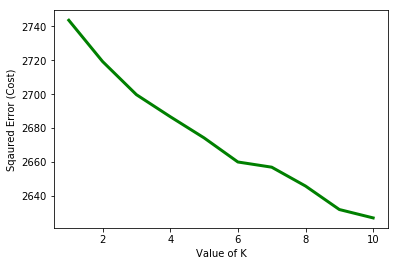

In [85]:
from sklearn.cluster import KMeans

#using the elbow method to get the optimum value for K
cost =[] 
for i in range(1, 11): 
    KM_test = KMeans(n_clusters = i, max_iter = 500) 
    KM_test.fit(tfidf_norm) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM_test.inertia_)    
    
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

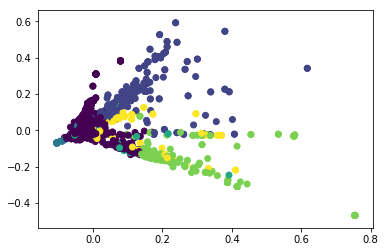

In [96]:
#initializing Kmeans and predicting cluster value for each data point
km = KMeans(n_clusters=6, init='k-means++')
km.fit(tfidf_norm)

#predicting cluster for each datapoint in the data.
labels_pred_km = km.predict(tfidf_norm)

# Plot the solution.
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=labels_pred_km)
plt.show()


In [97]:
#creating a new column for dataframe X, containing cluster labels for each observation (datapoint) from Kmeans results.
df_combined['ClusterNum'] = labels_pred_km

In [98]:
df_combined.head(15)

,sentences,author,ClusterNum
0,Let me see: I'll give them a new pair of boot...,7,0
1,The minute the fox reached the bank he threw ...,3,0
2,There the same thing happened,6,0
3,These children were well thought of and pitie...,9,0
4,And\r\nhe is as much bigger than you as you a...,5,0
5,Little Joe Otter found that out when he took ...,6,1
6,'We won't talk about her any more if you'd ra...,7,0
7,""" GOLDSMITH TO JOHNSON",2,0
8,""" SIBBALD'S FIFE AND KINROSS",2,0
9,I,8,0


In [99]:
#examining ClusterName column
df_combined.ClusterNum.value_counts()

0    2335
1     259
4     143
5      79
3      69
2      25
Name: ClusterNum, dtype: int64

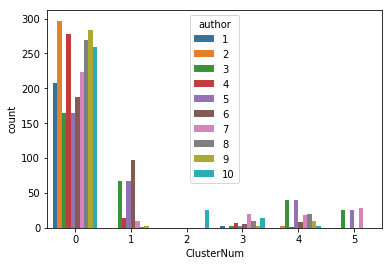

In [124]:
sns.countplot(x="ClusterNum", hue="author", data=df_combined)

In [90]:
df_combined['author'] = df_combined["author"].map({'milton':1, "melville":2, "austen":3, "blake":4, "bryant":5, 
                                                  "burgess":6, "carroll":7, "chesterton":8, "edgeworth":9, 
                                                  "shakespeare":10})


In [91]:
#setting the output variable to be put into model.
Y = df_combined['author']
print(Y.dtype)
print(Y)

int64
0        7
1        3
2        6
3        9
4        5
5        6
6        7
7        2
8        2
9        8
10       8
11       3
12       3
13       5
14      10
15       5
16       7
17       8
18       9
19       4
20       1
21      10
22       8
23       4
24      10
25       3
26       2
27      10
28       9
29       8
        ..
2880     8
2881     9
2882     5
2883     5
2884     2
2885     9
2886     6
2887     7
2888     9
2889     7
2890     7
2891     6
2892     2
2893     7
2894     5
2895    10
2896    10
2897     4
2898    10
2899     4
2900     8
2901     5
2902     2
2903     5
2904     4
2905     9
2906     4
2907     2
2908     9
2909     2
Name: author, Length: 2910, dtype: int64


In [92]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.
svd= TruncatedSVD(1200)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data.
lsa_tfidf = lsa.fit_transform(corpus_var_tfidf)


variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
#paras_by_component=pd.DataFrame(train_X_lsa,index=train_X)
#for i in range(5):
#    print('Component {}:'.format(i))
#    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])


Percent variance captured by all components: 93.08431990645244


In [93]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import datetime
from sklearn.model_selection import train_test_split

In [94]:
#creating inital train test split
train_X, test_X, train_Y, test_Y = train_test_split(lsa_tfidf, Y, test_size=.2, random_state=2)
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)


(2328, 1200)
(2328,)
(582, 1200)
(582,)


In [95]:
print('infinity values in train_X: ', np.isinf(train_X).sum())
print('infinity values in train_Y: ', np.isinf(train_Y).sum())


print(np.isnan(train_Y).any().sum())
print(np.isnan(train_X).any().sum())
print(np.isnan(test_Y).any().sum())
print(np.isnan(test_X).any().sum())


infinity values in train_X:  0
infinity values in train_Y:  0
0
0
0
0


In [ ]:
#replacing the infinite values
X_df['Bedroom2Transformed'] = X_df['Bedroom2Transformed'].replace([np.inf, -np.inf], 6)


#rechecking for infinity values in Bedroom2Transformed
print('infinity values in Bedroom2Transformed: ', np.isinf(X_df['Bedroom2Transformed']).sum())

## Decision Tree

In [104]:
# perform grid search to find the optimal parameters for our decision tree model, using TF-IDF
dtree = tree.DecisionTreeClassifier(random_state=76)
tree_param_grid = {'max_depth':[100,200], 'min_samples_split':[5,10,15], 'max_features':[700,800], 
                   'criterion':['entropy', 'gini']}
dtree_grid = GridSearchCV(dtree, tree_param_grid, cv=5, verbose=3)
dtree_grid.fit(train_X, train_Y)
print('Best parameters for decision tree: ', dtree_grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=entropy, max_depth=100, max_features=700, min_samples_split=5 
[CV]  criterion=entropy, max_depth=100, max_features=700, min_samples_split=5, score=0.3829787234042553, total=   2.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] criterion=entropy, max_depth=100, max_features=700, min_samples_split=5 
[CV]  criterion=entropy, max_depth=100, max_features=700, min_samples_split=5, score=0.36538461538461536, total=   2.8s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV] criterion=entropy, max_depth=100, max_features=700, min_samples_split=5 
[CV]  criterion=entropy, max_depth=100, max_features=700, min_samples_split=5, score=0.3583690987124464, total=   2.8s
[CV] criterion=entropy, max_depth=100, max_features=700, min_samples_split=5 
[CV]  criterion=entropy, max_depth=100, max_features=700, min_samples_split=5, score=0.39740820734341253, total=   2.9s
[CV] criterion=entropy, max_depth=100, max_features=700, min_samples_split=5 
[CV]  criterion=entropy, max_depth=100, max_features=700, min_samples_split=5, score=0.3796095444685466, total=   2.9s
[CV] criterion=entropy, max_depth=100, max_features=700, min_samples_split=10 
[CV]  criterion=entropy, max_depth=100, max_features=700, min_samples_split=10, score=0.3872340425531915, total=   3.0s
[CV] criterion=entropy, max_depth=100, max_features=700, min_samples_split=10 
[CV]  criterion=entropy, max_depth=100, max_features=700, min_samples_split=10, score=0.39316239316239315, total=   2.8s
[CV] crit

[CV] criterion=entropy, max_depth=200, max_features=700, min_samples_split=15 
[CV]  criterion=entropy, max_depth=200, max_features=700, min_samples_split=15, score=0.38228941684665224, total=   2.8s
[CV] criterion=entropy, max_depth=200, max_features=700, min_samples_split=15 
[CV]  criterion=entropy, max_depth=200, max_features=700, min_samples_split=15, score=0.4229934924078091, total=   2.9s
[CV] criterion=entropy, max_depth=200, max_features=800, min_samples_split=5 
[CV]  criterion=entropy, max_depth=200, max_features=800, min_samples_split=5, score=0.38085106382978723, total=   3.3s
[CV] criterion=entropy, max_depth=200, max_features=800, min_samples_split=5 
[CV]  criterion=entropy, max_depth=200, max_features=800, min_samples_split=5, score=0.36324786324786323, total=   3.3s
[CV] criterion=entropy, max_depth=200, max_features=800, min_samples_split=5 
[CV]  criterion=entropy, max_depth=200, max_features=800, min_samples_split=5, score=0.3669527896995708, total=   3.1s
[CV] cri

[CV] criterion=gini, max_depth=100, max_features=800, min_samples_split=15 
[CV]  criterion=gini, max_depth=100, max_features=800, min_samples_split=15, score=0.40638297872340423, total=   1.2s
[CV] criterion=gini, max_depth=100, max_features=800, min_samples_split=15 
[CV]  criterion=gini, max_depth=100, max_features=800, min_samples_split=15, score=0.3952991452991453, total=   1.3s
[CV] criterion=gini, max_depth=100, max_features=800, min_samples_split=15 
[CV]  criterion=gini, max_depth=100, max_features=800, min_samples_split=15, score=0.3626609442060086, total=   1.0s
[CV] criterion=gini, max_depth=100, max_features=800, min_samples_split=15 
[CV]  criterion=gini, max_depth=100, max_features=800, min_samples_split=15, score=0.41252699784017277, total=   1.0s
[CV] criterion=gini, max_depth=100, max_features=800, min_samples_split=15 
[CV]  criterion=gini, max_depth=100, max_features=800, min_samples_split=15, score=0.3969631236442516, total=   1.1s
[CV] criterion=gini, max_depth=20

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.3min finished


Best parameters for decision tree:  {'criterion': 'gini', 'max_depth': 100, 'max_features': 700, 'min_samples_split': 5}


In [105]:
print('decision tree best score from Gridsearchcv: ', dtree_grid.best_score_)

decision tree best score from Gridsearchcv:  0.40764604810996563


In [106]:
# Initialize and train our tree using full data
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=700,
    max_depth=100,
    min_samples_split=5
)

#set start time
start_time2 = datetime.datetime.now()

#train our tree
decision_tree.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_dtree = decision_tree.predict(test_X)

#Run score
print('Score: ', decision_tree.score(test_X, test_Y))

#get accuracy score from our model
print('Accuracy score for decision tree Model: ' + str(metrics.accuracy_score(test_Y, y_pred_dtree)))

#calculate end time
end_time2 = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time2 - start_time2))
print()

#get accuracy score of decision tree
tree_score = cross_val_score(decision_tree, lsa_tfidf, Y, cv=5, scoring='accuracy')
print(tree_score)
print('Average cross validated score from our decision tree model is: ' + str(np.mean(tree_score)))

Score:  0.38316151202749144
Accuracy score for decision tree Model: 0.38316151202749144

Duration: 0:00:01.878977

[0.39862543 0.38659794 0.43298969 0.36426117 0.395189  ]
Average cross validated score from our decision tree model is: 0.39553264604811


## Random Forest:

In [121]:
# perform grid search to find the optimal parameters for our random forest model using full data
rforest = ensemble.RandomForestClassifier(random_state=56)
forest_param_grid = {'n_estimators':[50,150], 'max_depth':[100,200], 'min_samples_split':[10,15], 
                     'max_features':[700,800]}
rforest_grid = GridSearchCV(rforest, forest_param_grid, cv=5, verbose=3)
rforest_grid.fit(train_X, train_Y)



Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=100, max_features=700, min_samples_split=10, n_estimators=50 
[CV]  max_depth=100, max_features=700, min_samples_split=10, n_estimators=50, score=0.5191489361702127, total= 1.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] max_depth=100, max_features=700, min_samples_split=10, n_estimators=50 
[CV]  max_depth=100, max_features=700, min_samples_split=10, n_estimators=50, score=0.5427350427350427, total= 1.3min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.6min remaining:    0.0s


[CV] max_depth=100, max_features=700, min_samples_split=10, n_estimators=50 
[CV]  max_depth=100, max_features=700, min_samples_split=10, n_estimators=50, score=0.5493562231759657, total= 1.3min
[CV] max_depth=100, max_features=700, min_samples_split=10, n_estimators=50 
[CV]  max_depth=100, max_features=700, min_samples_split=10, n_estimators=50, score=0.5464362850971922, total= 1.3min
[CV] max_depth=100, max_features=700, min_samples_split=10, n_estimators=50 
[CV]  max_depth=100, max_features=700, min_samples_split=10, n_estimators=50, score=0.5314533622559653, total= 1.4min
[CV] max_depth=100, max_features=700, min_samples_split=10, n_estimators=150 
[CV]  max_depth=100, max_features=700, min_samples_split=10, n_estimators=150, score=0.5127659574468085, total= 3.7min
[CV] max_depth=100, max_features=700, min_samples_split=10, n_estimators=150 
[CV]  max_depth=100, max_features=700, min_samples_split=10, n_estimators=150, score=0.5641025641025641, total= 3.6min
[CV] max_depth=100, m

[CV]  max_depth=200, max_features=700, min_samples_split=10, n_estimators=50, score=0.5464362850971922, total=  28.7s
[CV] max_depth=200, max_features=700, min_samples_split=10, n_estimators=50 
[CV]  max_depth=200, max_features=700, min_samples_split=10, n_estimators=50, score=0.5314533622559653, total=  29.2s
[CV] max_depth=200, max_features=700, min_samples_split=10, n_estimators=150 
[CV]  max_depth=200, max_features=700, min_samples_split=10, n_estimators=150, score=0.5127659574468085, total= 1.4min
[CV] max_depth=200, max_features=700, min_samples_split=10, n_estimators=150 
[CV]  max_depth=200, max_features=700, min_samples_split=10, n_estimators=150, score=0.5641025641025641, total= 1.4min
[CV] max_depth=200, max_features=700, min_samples_split=10, n_estimators=150 
[CV]  max_depth=200, max_features=700, min_samples_split=10, n_estimators=150, score=0.5493562231759657, total= 1.4min
[CV] max_depth=200, max_features=700, min_samples_split=10, n_estimators=150 
[CV]  max_depth=20

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 109.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=56, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 150], 'max_depth': [100, 200], 'min_samples_split': [10, 15], 'max_features': [700, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [122]:
print('Best parameters for random forest: ', rforest_grid.best_params_)
print('Best score for random forest: ', rforest_grid.best_score_)

Best parameters for random forest:  {'max_depth': 100, 'max_features': 700, 'min_samples_split': 15, 'n_estimators': 150}
Best score for random forest:  0.5511168384879725


In [123]:
#initialize and train our random forest model using full data
rand_forest = ensemble.RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=100, max_features=700,
                                              min_samples_split=15)

#set start time
start_time3 = datetime.datetime.now()

rand_forest.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_rforest = rand_forest.predict(test_X)

#get accuracy score from our model
print('Accuracy score for Random Forest Model: ' + str(metrics.accuracy_score(test_Y, y_pred_rforest)))

#calculate end time
end_time3 = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time3 - start_time3))
print()

#get average accuracy score of our random forest through cross validation
rforest_cvs = cross_val_score(rand_forest, lsa_tfidf, Y, cv=5, scoring='accuracy')
print(rforest_cvs)
print('Average cross validated score from our Random Forest Model is: ' + str(np.mean(rforest_cvs)))

Accuracy score for Random Forest Model: 0.5807560137457045

Duration: 0:01:52.727260

[0.57560137 0.5532646  0.52749141 0.54982818 0.53608247]
Average cross validated score from our Random Forest Model is: 0.5484536082474227


## Logistic Regression

In [125]:
#initialize and train our model with full data
LogReg = LogisticRegression(C=1e9, random_state=412)

#set start time
start_time4 = datetime.datetime.now()

#fit and train the model
LogReg.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_LogReg = LogReg.predict(test_X)

#get accuracy score from our model
print('Accuracy score for Logistic regression Model: ' + str(metrics.accuracy_score(test_Y, y_pred_LogReg)))

#calculate end time
end_time4 = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time4 - start_time4))
print()

#get average accuracy score using cross validation
LogReg_cvs = cross_val_score(LogReg, lsa_tfidf, Y, cv=5, scoring='accuracy')
print(LogReg_cvs)

print('Average cross validated score from our log regression model is: ' + str(np.mean(LogReg_cvs)))

C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy score for Logistic regression Model: 0.5962199312714777

Duration: 0:00:17.501216



C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\s

[0.59793814 0.55498282 0.57560137 0.59278351 0.54982818]
Average cross validated score from our log regression model is: 0.5742268041237113


## KNN Classifier:

In [126]:
# perform grid search to find the optimal parameters for our KNN model, using full data.
KNN = KNeighborsClassifier()
param_grid = {'n_neighbors':[5,10,15], 'weights':['uniform', 'distance']}
KNN_grid = GridSearchCV(KNN, param_grid, cv=5, verbose=3)
KNN_grid.fit(train_X, train_Y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=5, weights=uniform ..................................
[CV]  n_neighbors=5, weights=uniform, score=0.20212765957446807, total=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] n_neighbors=5, weights=uniform ..................................
[CV]  n_neighbors=5, weights=uniform, score=0.20085470085470086, total=   1.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.9s remaining:    0.0s


[CV] n_neighbors=5, weights=uniform ..................................


KeyboardInterrupt: 

In [ ]:
print('Best parameters for data:', KNN_grid.best_params_)

In [127]:
#initialize and train our model using the training set and full data
KNN = KNeighborsClassifier(n_neighbors=10, weights='uniform')

#set start time
start_time6 = datetime.datetime.now()

#fit and train the model
KNN.fit(train_X,train_Y)

#Make predictions using test_X, and store results in new variable
y_pred_KNN = KNN.predict(test_X)

print('Accuracy score for KNN Model: ' + str(metrics.accuracy_score(test_Y, y_pred_KNN)))

#calculate end time
end_time6 = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time6 - start_time6))
print()


KNN_cvs = cross_val_score(KNN, lsa_tfidf, Y, cv=5, scoring='accuracy')
print(KNN_cvs)
print('Average cross validated score from our KNN model is: ' + str(np.mean(KNN_cvs)))


Accuracy score for KNN Model: 0.16151202749140894

Duration: 0:00:02.684823

[0.15635739 0.16151203 0.1580756  0.15635739 0.1580756 ]
Average cross validated score from our KNN model is: 0.15807560137457044


## SVM:

In [128]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
svm = SVC(kernel = 'linear', probability=True, random_state=16)

#set start time
start_time7 = datetime.datetime.now()

#fit and train the model
svm.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_svm = svm.predict(test_X)

#get accuracy score from our model
print('Accuracy score for svm Model: ' + str(metrics.accuracy_score(test_Y, y_pred_svm)))

#calculate end time
end_time7 = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time7 - start_time7))
print()

#get average accuracy score of svm model using cross validation
svm_cvs = cross_val_score(svm, lsa_tfidf, Y, cv=5, scoring='accuracy')
print(svm_cvs)
print('Average accuracy score from our SVM model is: ' + str(np.mean(svm_cvs)))

Accuracy score for svm Model: 0.6580756013745704

Duration: 0:00:48.461463

[0.6443299  0.63573883 0.61683849 0.63230241 0.62027491]
Average accuracy score from our SVM model is: 0.6298969072164948
